# pandas 介绍

pandas是构建于numpy之上的数据分析库，它使数据分析变的更简单。

pandas的优势:
* 增强图表可读性
* 便捷的数据处理能力
* 读取文件方便
* 封装了Matplotlib、Numpy的画图和计算

# pandas数据结构 Series
Series是一个类似于一维数组的数据结构，他能保存任何类型的数据，整数、字符串、浮点数等，`主要由一组数据和与之相关的索引两部分组成。`

## Series 的创建

pd.Series(data=None,index=None,dtype=None)
* data:传入的数据，ndarray、list等
* index:索引
* dtype: 数据类型

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.Series(np.arange(9))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
dtype: int32

In [3]:
#指定index
pd.Series([1.2,2.3,4.5,5.0],index=[1,2,3,4])

1    1.2
2    2.3
3    4.5
4    5.0
dtype: float64

In [4]:
#使用字典创建
color=pd.Series({'red':10,'green':20,'blue':100})
color

red       10
green     20
blue     100
dtype: int64

## Series 的属性

In [5]:
color.index #获取索引

Index(['red', 'green', 'blue'], dtype='object')

In [6]:
color.values #获取所有值

array([ 10,  20, 100], dtype=int64)

In [7]:
color[0] #使用下标获取值

10

# pandas数据结构 DataFrame

DataFrame是一个类似于二维数组或表格（如excel）的对象，既有行索引，又有列索引

## DataFrame的创建

pd.DataFrame(data,index,columns)
* index:行标签
* columns:列标签

In [8]:
pd.DataFrame(np.random.randn(2,3))

,0,1,2
0,0.306399,0.611017,-0.348059
1,-0.304920,-0.073332,-2.005467


In [9]:
index_=['index{}'.format(i) for i in range(2)]
col_=['column{}'.format(i) for i in range(3)]
data=pd.DataFrame(np.random.randn(2,3),index_,col_)
data

,column0,column1,column2
index0,0.914755,-1.844349,1.815667
index1,2.340283,0.511129,0.075426


## DataFrame属性

In [10]:
data.shape #查看形状

(2, 3)

In [11]:
data.index #行索引列表

Index(['index0', 'index1'], dtype='object')

In [12]:
data.columns #列索引列表

Index(['column0', 'column1', 'column2'], dtype='object')

In [13]:
data.values #直接获取其中array的值

array([[ 0.9147549 , -1.84434945,  1.81566727],
       [ 2.34028253,  0.51112862,  0.07542588]])

In [14]:
data.T #转置

,index0,index1
column0,0.914755,2.340283
column1,-1.844349,0.511129
column2,1.815667,0.075426


In [15]:
data.head(1) #显示前1行内容，默认为5

,column0,column1,column2
index0,0.914755,-1.844349,1.815667


In [16]:
data.tail(1) #显示后1行内容，默认为5

,column0,column1,column2
index1,2.340283,0.511129,0.075426


## DataFrame索引的设置

In [17]:
data.index=[1,2] #data.index[0]=1 错误！不能单独修改索引
data

,column0,column1,column2
1,0.914755,-1.844349,1.815667
2,2.340283,0.511129,0.075426


In [18]:
data.reset_index() #重设索引

,index,column0,column1,column2
0,1,0.914755,-1.844349,1.815667
1,2,2.340283,0.511129,0.075426


In [19]:
data.reset_index(drop=True) #重设索引,删除原有索引

,column0,column1,column2
0,0.914755,-1.844349,1.815667
1,2.340283,0.511129,0.075426


### 以某列的值重设索引

In [20]:
df=pd.DataFrame({
    'month':[1,4,7,10],
    'year':[2012,2014,2013,2014],
    'sale':[35,54,65,32]
})
df

,month,year,sale
0,1,2012,35
1,4,2014,54
2,7,2013,65
3,10,2014,32


In [21]:
df.set_index('month') #以月份设置新的索引

,year,sale
month,,
1,2012,35
4,2014,54
7,2013,65
10,2014,32


In [22]:
df.set_index(['year','month']) #设置多索引，年和月； 成为MultiIndex

,,sale
year,month,
2012,1,35
2014,4,54
2013,7,65
2014,10,32


# 基本数据操作

## 索引操作

In [23]:
df

,month,year,sale
0,1,2012,35
1,4,2014,54
2,7,2013,65
3,10,2014,32


In [24]:
df['year'][0] #直接索引，必须是先列后行

2012

## 结合loc或iloc使用索引

In [25]:
# loc: 只能指定行列索引的名字
df.loc[:1,:'year']

,month,year
0,1,2012
1,4,2014


In [26]:
# iloc：可通过索引的下标获取
df.iloc[:2,:2]

,month,year
0,1,2012
1,4,2014


## 使用ix组合索引

In [27]:
# 0.20.0后版本将取消此功能，混合索引，可同时使用名字和下标获取值

#df.ix[0:2,['month','year']]

df.loc[df.index[0:2],['month','year']]


,month,year
0,1,2012
1,4,2014


## 赋值操作

In [28]:
data

,column0,column1,column2
1,0.914755,-1.844349,1.815667
2,2.340283,0.511129,0.075426


In [29]:
#对column0列重新赋值为1

data['column0'] = 1
# 或
data.column0 = 2

data

,column0,column1,column2
1,2,-1.844349,1.815667
2,2,0.511129,0.075426


## 排序

### DataFrame 排序

1. df.sort_values(by=,ascending=)
* 使用单个键或多个键进行排序
* 参数
    - by:指定排序参考的键
    - ascending: 默认升序
        - ascending：False 降序
        - ascending: True 升序

2. df.sort_index()
* 对索引进行排序

In [30]:
df

,month,year,sale
0,1,2012,35
1,4,2014,54
2,7,2013,65
3,10,2014,32


In [31]:
df.sort_values(by='sale')

,month,year,sale
3,10,2014,32
0,1,2012,35
1,4,2014,54
2,7,2013,65


In [32]:
# 按多个键进行排序
df.sort_values(by=['year','sale'])

,month,year,sale
0,1,2012,35
2,7,2013,65
3,10,2014,32
1,4,2014,54


In [33]:
df.sort_index()

,month,year,sale
0,1,2012,35
1,4,2014,54
2,7,2013,65
3,10,2014,32


### Series 排序

series.sort_values(ascending=True)
* series 排序时，只有一列，无需参数

series.sort_index()
* 对索引进行排序

# DataFrame 运算

## 算术运算

In [34]:
data

,column0,column1,column2
1,2,-1.844349,1.815667
2,2,0.511129,0.075426


In [35]:
data.add(2) #加法

,column0,column1,column2
1,4,0.155651,3.815667
2,4,2.511129,2.075426


In [36]:
data.sub(1) # 减法

,column0,column1,column2
1,1,-2.844349,0.815667
2,1,-0.488871,-0.924574


## 逻辑运算

In [37]:
data

,column0,column1,column2
1,2,-1.844349,1.815667
2,2,0.511129,0.075426


In [41]:
data['column2'] > 1 #返回布尔值

1     True
2    False
Name: column2, dtype: bool

In [40]:
data[data['column2'] > 1] #逻辑运算结果可作为筛选的依据

,column0,column1,column2
1,2,-1.844349,1.815667


In [43]:
data[(data['column2'] > 1) & (data['column1'] < 0)] #多个逻辑判断

,column0,column1,column2
1,2,-1.844349,1.815667


## 逻辑运算函数

### query(expr)
* expr: 查询字符串

In [44]:
data.query('column2>1 & column1<0')

,column0,column1,column2
1,2,-1.844349,1.815667


### isin(values)

In [46]:
data[data['column1'].isin([1,2])] #判断'column1' 是否为1或2

,column0,column1,column2


## 统计运算

### describe()
* 综合分析：能够直接得出很多统计结果，count,mean ... 等

In [47]:
data.describe()

,column0,column1,column2
count,2.0,2.000000,2.000000
mean,2.0,-0.666610,0.945547
std,0.0,1.665575,1.230536
min,2.0,-1.844349,0.075426
25%,2.0,-1.255480,0.510486
50%,2.0,-0.666610,0.945547
75%,2.0,-0.077741,1.380607
max,2.0,0.511129,1.815667


## 统计函数

In [48]:
data.max() #每列最大值

column0    2.000000
column1    0.511129
column2    1.815667
dtype: float64

In [51]:
data.min()

column0    2.000000
column1   -1.844349
column2    0.075426
dtype: float64

In [53]:
data.median() #中位数

column0    2.000000
column1   -0.666610
column2    0.945547
dtype: float64

In [61]:
data.idxmax() #获取最大值的索引，axis=1对行索引

column0    1
column1    2
column2    1
dtype: int64

In [60]:
data.mode() #众数

,column0,column1,column2
0,2.0,-1.844349,0.075426
1,NaN,0.511129,1.815667


## 累计统计函数

|函数|作用|
|:-:|:-:|
|cumsum|计算前1/2/3/.../n个数的和
|cummax|计算前1/2/3/.../n个数的最大值
|cummin|计算前1/2/3/.../n个数的最小值
|cumprod|计算前1/2/3/.../n个数的积

cum: cumulative 累计

In [63]:
df

,month,year,sale
0,1,2012,35
1,4,2014,54
2,7,2013,65
3,10,2014,32


In [66]:
df.cumsum()

,month,year,sale
0,1,2012,35
1,5,4026,89
2,12,6039,154
3,22,8053,186


## 自定义运算

### apply(func,axis=0)

* func:自定义函数
* asix=0:默认为列，aixs=1为行进行运算

In [67]:
df

,month,year,sale
0,1,2012,35
1,4,2014,54
2,7,2013,65
3,10,2014,32


In [70]:
df[['year','sale']].apply(lambda x:x.max(),axis=0)

year    2014
sale      65
dtype: int64

# pandas 画图

## pandas.DataFrame.plot(kind='line')

* kind:str 需要绘制图形的种类
    - line:折线图
    - bar:直方图
    - barh: 水平直方图
    - hist
    - pie
    - scatter

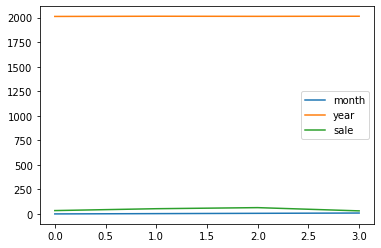

In [77]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

## pandas.Series.plot()